# Introduction to Image Processing

Guillaume Lemaitre - Fabrice Meriaudeau

## Introduction to scikit-image

All redundant modules used during this practise can be entered in the following cell:

In [1]:
%matplotlib inline
%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

Pretty printing has been turned OFF


### Image in skimage

First, you need to understand how to deal with images.

In this regard, you will need to refer to two main modules of *skimage*. The first module will give all the information about [input-output](http://scikit-image.org/docs/dev/api/skimage.io.html) in order to read, write, and show image. The second module is as important and refers to the [utility functions](http://scikit-image.org/docs/stable/api/skimage.html) which allow you to know what is the data type of the images.

#### IO module

In this part, you will rely on the module **io** of the `skimage`. This module can be imported as:

In [2]:
from skimage import io

Now, any function of this module can be called by `io.name_of_the_function`. See the following [webpage](http://scikit-image.org/docs/dev/api/skimage.io.html) to know all the functions available and the arguments of each of them.

##### imread() and imshow()

We will first play with the functions `io.imread()` and `io.imshow()` in order to read and show images. Refer to the documentation to know about the input and output arguments associated with this function. 

The first task will be to read the grayscale image called `lena-grey.bmp` and show it.

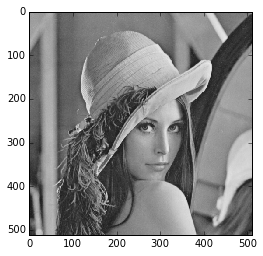

In [3]:
# Just to not make any mistakes the path is given here
filename = './images/lena-grey.bmp'

# Now read the image and display it
lena_im = io.imread(filename)

# Show Lena
io.imshow(lena_im)

In order to understand, the data type of this image, you can print the shape and data type of the image read. Refer to function [`shape()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) and [`dtype()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.dtype.html) from the `numpy` library.

In [4]:
# Print information about the shape of the image
print 'The shape of the image is {} and the data type is {}'.format(lena_im.shape, lena_im.dtype)

The shape of the image is (512, 512) and the data type is uint8


The `io.imshow()` function is probided by the `skimage` library. However, it is interesting to know that this function is heritated from the very well known `matplotlib` library. This library has been imported in the preamble of this document and can be called with the prefix `plt`. For instance we can show an image as:

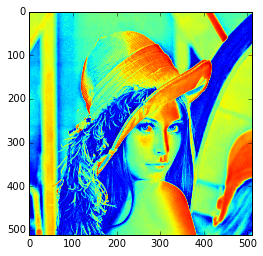

In [5]:
# Show the same image using matplotlib library
plt.imshow(lena_im)

You can see that this image is displayed with false color. Each gray level is replaced by a given color. In this specific case, bright color are represented by red and dark color by blue. This mapping is known as `colormap`. To obtain similar results than in `skimage`, we need to apply a grey colormap. More information about colormap can be found [here](http://matplotlib.org/examples/color/colormaps_reference.html).


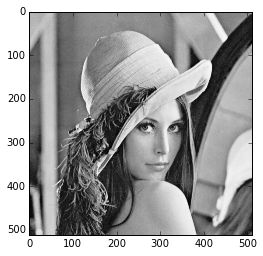

In [6]:
# Show the same image using matplotlib library and a grey colormap
plt.imshow(lena_im, cmap=cm.Greys_r)

You can do the same manipulation and open a color image using the file `vibot-color.jpg`

The shape of the image is (301, 222, 3) and the data type is uint8


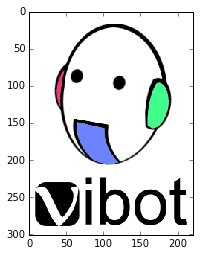

In [7]:
# Read the Vibot image which is a color image
filename = './images/vibot-color.jpg'
vibot_im = io.imread(filename)

# Print information about the shape of the image and type
print 'The shape of the image is {} and the data type is {}'.format(vibot_im.shape, vibot_im.dtype)

# Show the image
io.imshow(vibot_im)

Checking the documentation of the function `imread`, open the previous color image as a grey scale image.

The shape of the image is (301, 222) and the data type is float64


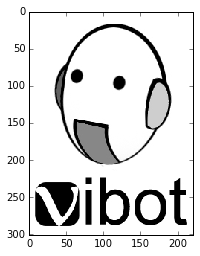

In [8]:
# Read the Vibot image which is a color image
filename = './images/vibot-color.jpg'
vibot_im = io.imread(filename, as_grey=True)

# Print information about the shape of the image and type
print 'The shape of the image is {} and the data type is {}'.format(vibot_im.shape, vibot_im.dtype)

# Show the image
io.imshow(vibot_im)

Observe attentively the change of the data type.

##### Data type

It is important to understand which type of data do you obtain once the image is loaded. Subsequent algorithm will require a certain type (*ie.*, float, unsigned int) included in a certain range. That is why, you need to refer to the [utility functions](http://scikit-image.org/docs/stable/api/skimage.html) in order to perform the right conversion between types.

Re-open the data from the grey-scale image `lena-grey.bmp` and print the matrix and the type which were loaded by default. 

In [26]:
# Just to not make any mistakes the path is given here
filename = './images/lena-grey.bmp'

# Now read the image and display it
lena_im = io.imread(filename)

# Print information about the shape of the image
print 'The shape of the image is {} and the data type is {}'.format(lena_im.shape, lena_im.dtype)

print lena_im

The shape of the image is (512, 512) and the data type is uint8
[[162 162 162 ..., 170 155 128]
 [162 162 162 ..., 170 155 128]
 [162 162 162 ..., 170 155 128]
 ..., 
 [ 43  43  50 ..., 104 100  98]
 [ 44  44  55 ..., 104 105 108]
 [ 44  44  55 ..., 104 105 108]]


A set of functions allows to make automatic conversion of type and range and can be called as `img_as_type()`. 

Usually, algorithms expect images as float type in the range [0.0, 1.0]. However, the previous data were coded with 8-bits unsigned integer. Make the conversion to obtain float in the range [0.0, 1.0].

In [9]:
# Import the utility function
from skimage import img_as_float

# Make the conversion
lena_im_float = img_as_float(lena_im)

# Print information about the shape of the image
print 'The shape of the image is {} and the data type is {}'.format(lena_im_float.shape, lena_im_float.dtype)

print lena_im_float

The shape of the image is (512, 512) and the data type is float64
[[ 0.63529412  0.63529412  0.63529412 ...,  0.66666667  0.60784314
   0.50196078]
 [ 0.63529412  0.63529412  0.63529412 ...,  0.66666667  0.60784314
   0.50196078]
 [ 0.63529412  0.63529412  0.63529412 ...,  0.66666667  0.60784314
   0.50196078]
 ..., 
 [ 0.16862745  0.16862745  0.19607843 ...,  0.40784314  0.39215686
   0.38431373]
 [ 0.17254902  0.17254902  0.21568627 ...,  0.40784314  0.41176471
   0.42352941]
 [ 0.17254902  0.17254902  0.21568627 ...,  0.40784314  0.41176471
   0.42352941]]


From now, you are good to go in the world of digital image processing. However, always take care about the type of data you are dealing with and what results you are expecting from the different processing.

### Basic transformation functions

First, we will dig into the different basic transformation functions which allows to improve the contrast of grey scale images. All these functions are part of the `exposure` module of `skimage`.

In [19]:
# We can import this module now
from skimage import exposure

As previously done with the module `io`, you can use any function of this module using `exposure.name_of_the_function()`.

#### Log transformations

The log transformation increases the contrast of the low intensities in an image by stretching a narrow range of these low intensities into a wider range of intensities. However, the opposite is taking place regarding the high intensities.

Refer to [`exposure.adjust_log()`](http://scikit-image.org/docs/dev/api/skimage.exposure.html#adjust-log) for the use of this function.

We recall the transformation function $s = c \log(1 + r)$. We illustrate this transformation by varying the parameter $c$.

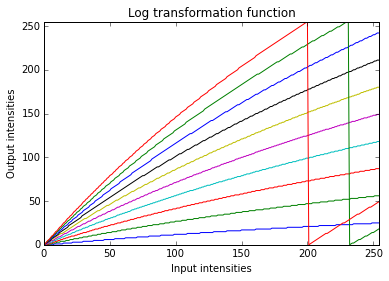

In [61]:
# Define a set of 256 values ranging from 0 to 255
x = np.arange(255, dtype='uint8')

# Define the parameter c
c = np.linspace(.1, 1.2, num=10)

# Plot the transform function
plt.figure()
for c_par in c:
    plt.plot(x, exposure.adjust_log(x, gain = c_par))
plt.xlabel('Input intensities')
plt.ylabel('Output intensities')
plt.title('Log transformation function')
plt.axis('tight')
plt.show()

Now this is your time to make this transformation on a real image. Compute the magnitude of the Discrete Fourier Transform (DFT) of `lena-grey.bmp`. You need to apply the `np.fft.fft2()` as well as `np.abs()` function. In order to display the low frequency at the center of the image, you can use the function `np.fft.fftshift()`.

Additionaly, we provide a visualisation of the histogram such that you can visualise the results. 

Later, use the log transformation to increase the contrast of the magnitude image. Display the resulting image as well as its histogram.

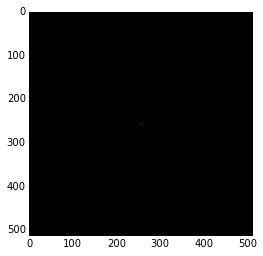

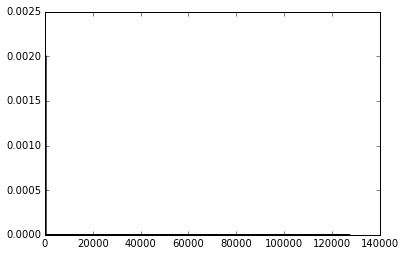

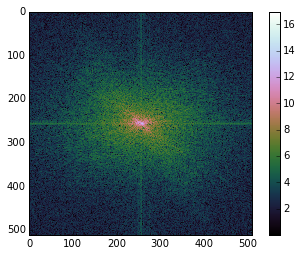

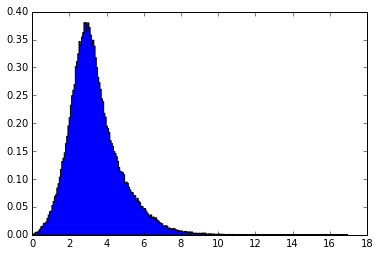

In [86]:
# Compute the Fourier transform an get the magnitude and display it
lena_im_fft = np.fft.fft2(lena_im_float)
lena_im_mag = np.fft.fftshift(np.abs(lena_im_fft))

# Show the magnitude image and its histogram
plt.figure()
plt.imshow(lena_im_mag, cmap=cm.Greys_r)
plt.figure()
n, bins, patches = plt.hist(lena_im_mag.flatten(), 256, normed=1, histtype='stepfilled')

# Apply a logarithm transformation
gain = 1.
lena_im_mag_log = exposure.adjust_log(lena_im_mag, gain=gain)
# Show the image after transformation and its transformation
plt.figure()
io.imshow(lena_im_mag_log)
plt.figure()
n, bins, patches = plt.hist(lena_im_mag_log.flatten(), 256, range=(0., np.max(lena_im_mag_log.flatten())),
                            normed=1, histtype='stepfilled')

Note that you can compute the inverse function using the input argument `inv=True`. 

#### Power-Law (Gamma) transformation

By looking at the log transformation formulation, there is no ideal way to change the slope its slope. The gamma transformation offer this modulation using a parameter $\gamma$. The transformation function can be formulated as $s = cr^{\gamma}$.

We illustrate this transformation by varying the parameter $\gamma$.

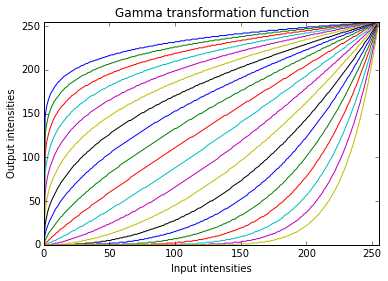

In [60]:
# Define a set of 256 values ranging from 0 to 255
x = np.arange(256, dtype='uint8')

# Define the parameter c
gamma = np.logspace(-1, 1., num=20)

# Plot the transform function
plt.figure()
for g in gamma:
    plt.plot(x, exposure.adjust_gamma(x, gamma=g, gain=1.))
plt.xlabel('Input intensities')
plt.ylabel('Output intensities')
plt.title('Gamma transformation function')
plt.axis('tight')
plt.show()

Reproduce the previous experiments carried out with the log transformation function for 10 different values of $\gamma$.

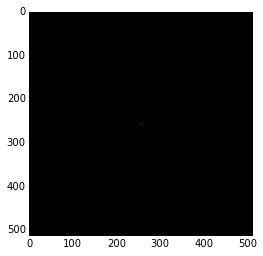

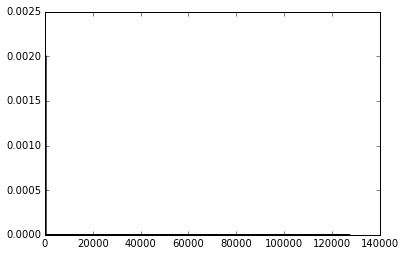

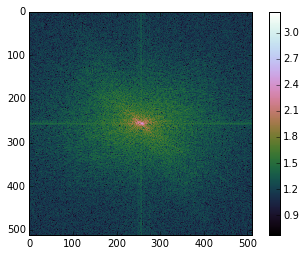

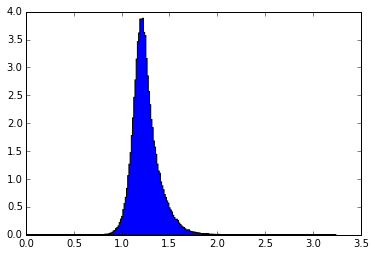

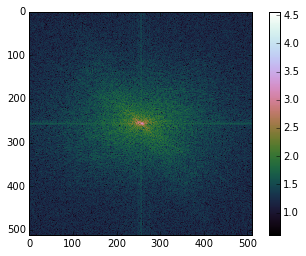

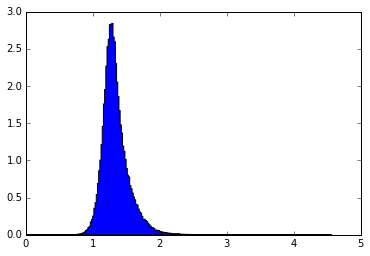

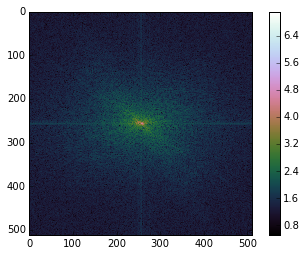

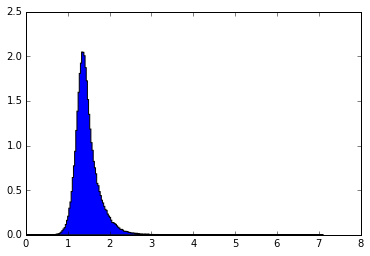

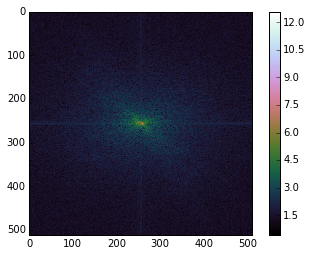

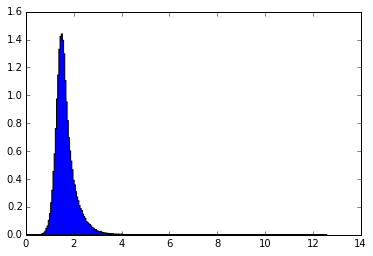

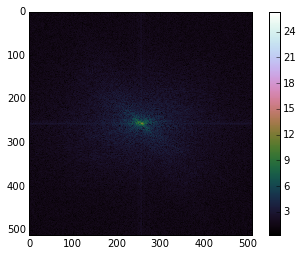

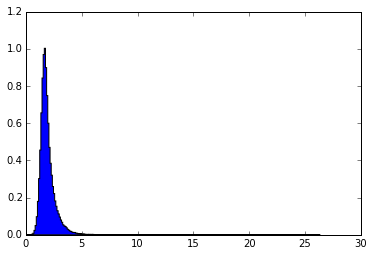

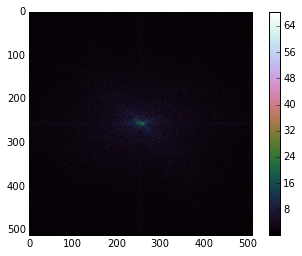

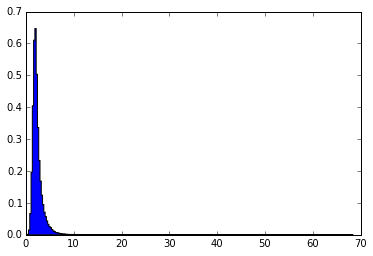

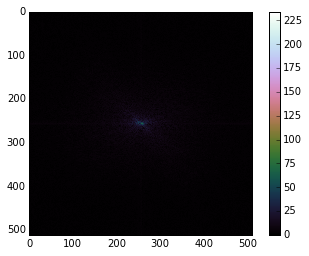

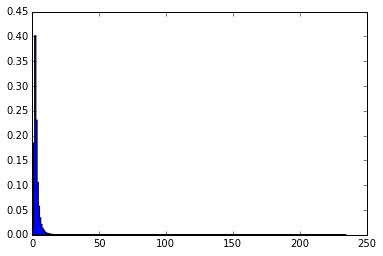

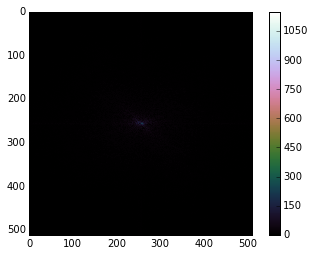

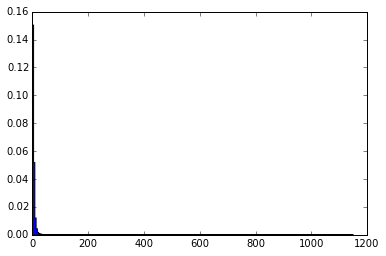

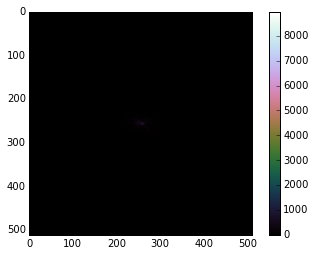

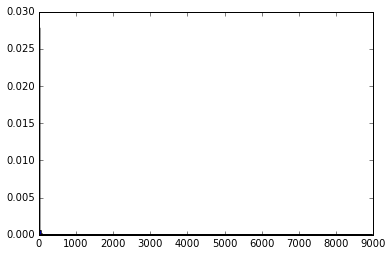

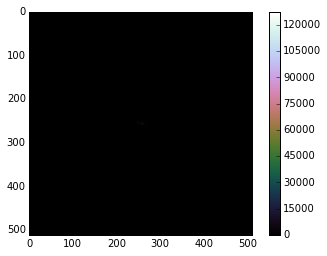

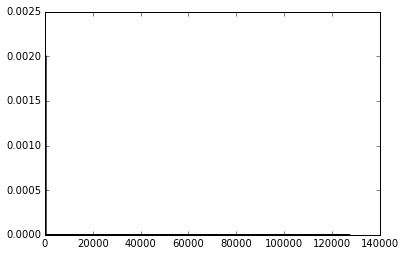

In [85]:
# Compute the Fourier transform an get the magnitude and display it
lena_im_fft = np.fft.fft2(lena_im_float)
lena_im_mag = np.fft.fftshift(np.abs(lena_im_fft))

# Show the magnitude image and its histogram
plt.figure()
plt.imshow(lena_im_mag, cmap=cm.Greys_r)
plt.figure()
n, bins, patches = plt.hist(lena_im_mag.flatten(), 256, normed=1, histtype='stepfilled')

# Apply a logarithm transformation
# Define the parameter
gain = 1.
gamma = np.logspace(-1, 0, num=10)

for g in gamma:
    lena_im_mag_log = exposure.adjust_gamma(lena_im_mag, gamma=g, gain=gain)
    # Show the image after transformation and its transformation
    plt.figure()
    io.imshow(lena_im_mag_log)
    plt.figure()
    n, bins, patches = plt.hist(lena_im_mag_log.flatten(), 256, range=(0., np.max(lena_im_mag_log.flatten())), 
                                normed=1, histtype='stepfilled')

To obtain an inverse of this function you need to have the inverse of $\gamma$.

#### Sigmoid transformation

This type of transformation did not have been presented during the lecture. However, it can be used to enhance the contrast inside images.

The transformation function is formulated as $s = \frac{1}{1 + \exp{\left(c(t - r)\right)}}$.

We will illustrate the function by varying the parameter $t$.

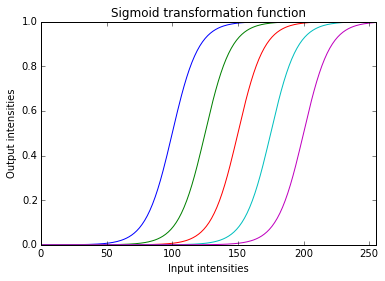

In [77]:
# Define a set of 256 values ranging from 0 to 255
x = np.arange(256, dtype='float')

# Define the parameter c
cut_off = np.linspace(100., 200., num=5)

# Plot the transform function
plt.figure()
for t in cut_off:
    plt.plot(x, exposure.adjust_sigmoid(x, cutoff=t, gain=.1))
plt.xlabel('Input intensities')
plt.ylabel('Output intensities')
plt.title('Sigmoid transformation function')
plt.axis('tight')
plt.show()

Improve the contrast of the image `satellite.jpg` by setting the cut-off after observing the histogram of the image. You can set the gain equal to 10.

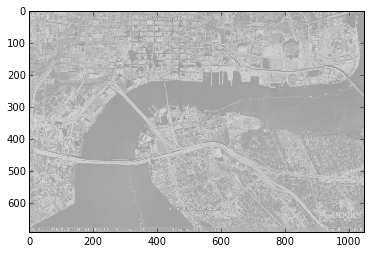

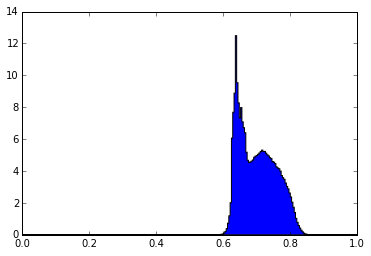

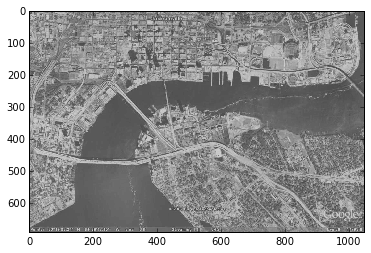

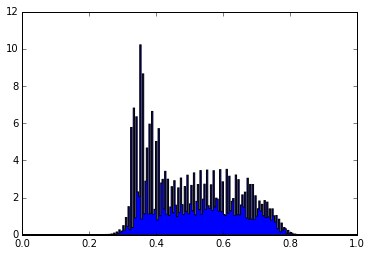

In [95]:
# Load the satellite image
sat_img_float = img_as_float(io.imread('./images/satellite.jpg', as_grey=True))

# Show the magnitude image and its histogram
plt.figure()
io.imshow(sat_img_float)
plt.figure()
n, bins, patches = plt.hist(sat_img_float.flatten(), 256, range=(0., 1.), normed=1, histtype='stepfilled')

# Apply the sigmoid function on the first peak
sat_sig_1 = exposure.adjust_sigmoid(sat_img_float, cutoff=0.7, gain=10)

# Show the magnitude image and its histogram
plt.figure()
io.imshow(sat_sig_1)
plt.figure()
n, bins, patches = plt.hist(sat_sig_1.flatten(), 256, range=(0., 1.), normed=1, histtype='stepfilled')

#### Contrast stretching

Taking the satellite image as an example, it can be noticed that the intensitites are compacted in the range [0.6, 0.8]. A simple contrast stretching can be used to map the value of this range between [0.0, 1.0].

The function `exposure.rescale_intensity` is devoted for this purpose.

Apply this function to obatin a contrast enhance image.

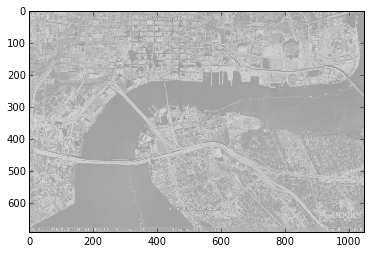

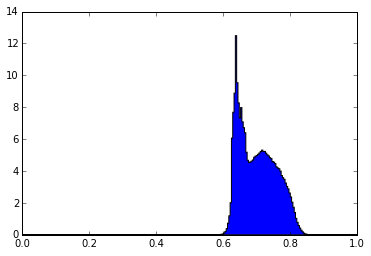

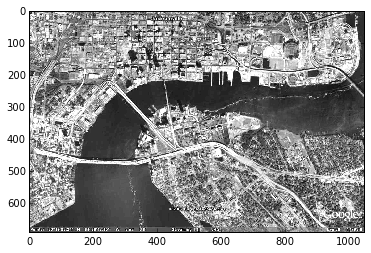

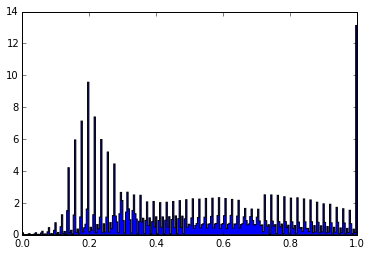

In [96]:
# Load the satellite image
sat_img_float = img_as_float(io.imread('./images/satellite.jpg', as_grey=True))

# Show the magnitude image and its histogram
plt.figure()
io.imshow(sat_img_float)
plt.figure()
n, bins, patches = plt.hist(sat_img_float.flatten(), 256, range=(0., 1.), normed=1, histtype='stepfilled')

# Apply the sigmoid function on the first peak
sat_sig_1 = exposure.rescale_intensity(sat_img_float, in_range=(.6, .8), out_range=(0., 1.))

# Show the magnitude image and its histogram
plt.figure()
io.imshow(sat_sig_1)
plt.figure()
n, bins, patches = plt.hist(sat_sig_1.flatten(), 256, range=(0., 1.), normed=1, histtype='stepfilled')

### Histogram processing

#### Histogram equalization

As previously saw in the lecture, histogram equalization can be used to enhance the contrast in images.

The idea behing the histogram equalization processing is that each gray level should have equal contribution in the image. The function allowing such transformation is in fact the cumulative density function.

The `exposure.equalize_hist` provide an optimized implementation for such processing. Apply this function on the satellite image.

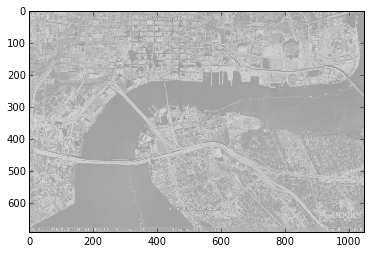

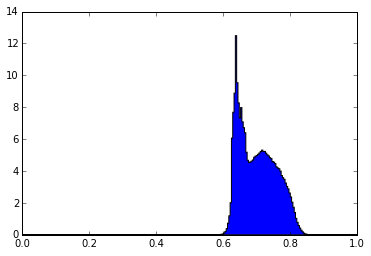

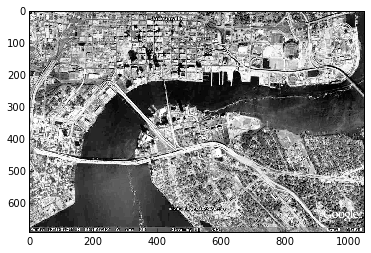

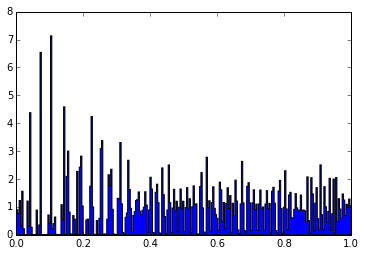

In [97]:
# Load the satellite image
sat_img_float = img_as_float(io.imread('./images/satellite.jpg', as_grey=True))

# Show the magnitude image and its histogram
plt.figure()
io.imshow(sat_img_float)
plt.figure()
n, bins, patches = plt.hist(sat_img_float.flatten(), 256, range=(0., 1.), normed=1, histtype='stepfilled')

# Apply the sigmoid function on the first peak
sat_sig_1 = exposure.equalize_hist(sat_img_float, nbins=256)

# Show the magnitude image and its histogram
plt.figure()
io.imshow(sat_sig_1)
plt.figure()
n, bins, patches = plt.hist(sat_sig_1.flatten(), 256, range=(0., 1.), normed=1, histtype='stepfilled')

#### Adaptive (local) histogram equalization

The histogram equalization is a global process. The adaptive version allows to perform the histogram equalization by local area. The contrast will be enhanced in dark and light area of an image which was not possible with the global version.

The `exposure.equalize_adapthist` function corresponds to this processing in the skimage.

Apply this algorithm for the satellite image with the default parameters regarding the region definition.

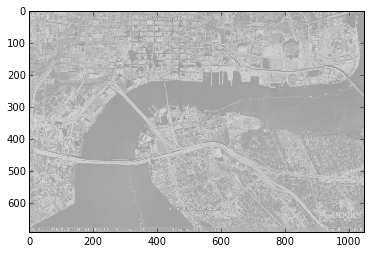

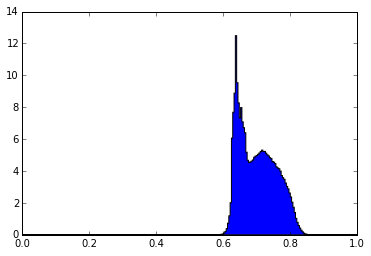

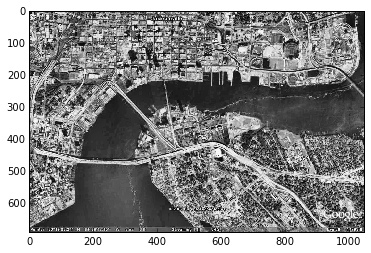

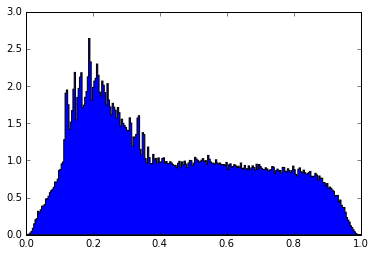

In [99]:
# Load the satellite image
sat_img_float = img_as_float(io.imread('./images/satellite.jpg', as_grey=True))

# Show the magnitude image and its histogram
plt.figure()
io.imshow(sat_img_float)
plt.figure()
n, bins, patches = plt.hist(sat_img_float.flatten(), 256, range=(0., 1.), normed=1, histtype='stepfilled')

# Apply the sigmoid function on the first peak
sat_sig_1 = exposure.equalize_adapthist(sat_img_float)

# Show the magnitude image and its histogram
plt.figure()
io.imshow(sat_sig_1)
plt.figure()
n, bins, patches = plt.hist(sat_sig_1.flatten(), 256, range=(0., 1.), normed=1, histtype='stepfilled')

Compare the results obtained with the global version of histogram equalization. Compare also the histogram obtained.